### Learning Curves

Learning Curves are plots of model learning performance over time, identify if our model was Overfitting or Underfitting. 

After a number of iterations, the training error is getting better, however. the validation error is not improving, that a clear sign that the model is overfitting. If Validation and training error high, then the model is Underfitting.

We will build regression model predicts the hourly electrical energy output of power plant. 
Data used come from https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant


In [2]:
#importing python package
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

In [3]:
#reading data
electric_outputs = pd.read_excel('CCPP/Folds5x2_pp.xlsx')
electric_outputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
electric_outputs.head(5)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [5]:
#let update column names of those Abbreviation by full name
electric_outputs.rename(columns={'AT': 'Ambiental Temp', 'V': 'Exhaust Vacuum',
                                'AP': 'Ambiental Pressure', 'RH': 'Relavite Humid',
                                'PE': 'Electrical Energy Output'}, inplace=True)

In [6]:
electric_outputs.head(5)

,Ambiental Temp,Exhaust Vacuum,Ambiental Pressure,Relavite Humid,Electrical Energy Output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [7]:
#training size for generating the learning curves, 
#maximum size must less than equal to training set 80% of dataset
#its good practice to limit to 5-10 training sizes
training_sizes = [1, 100, 500, 2000, 5000, 7650]

In [8]:
#independent variables and target
features = list(electric_outputs.drop(columns="Electrical Energy Output").columns)
target = "Electrical Energy Output"
#implement learning from imported python package
train_sizes, train_scores, validation_scores = learning_curve(
                                    estimator=LinearRegression(),#using Linear Regression as learning algorithm
                                    X = electric_outputs[features],# dataset excluded target
                                    y = electric_outputs[target],#target variable
                                    train_sizes=training_sizes,
                                    cv = 5, #determines cross-validation splitting strategy
                                    scoring='neg_mean_squared_error', #error metric evaluation
                                    )

In [9]:
#exam the training score, and validation scores
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[ -0.          -0.          -0.          -0.          -0.        ]
 [-19.71230701 -18.31492642 -18.31492642 -18.31492642 -18.31492642]
 [-18.14420459 -19.63885072 -19.63885072 -19.63885072 -19.63885072]
 [-21.53603444 -20.18568787 -19.98317419 -19.98317419 -19.98317419]
 [-20.47708899 -19.93364211 -20.56091569 -20.4150839  -20.4150839 ]
 [-20.98600946 -20.63033618 -21.04415862 -20.63671622 -20.52664106]]

 ----------------------------------------------------------------------

Validation scores:

 [[-619.30514723 -379.81090366 -374.4107861  -370.03037109 -373.30597982]
 [ -21.80224219  -23.01103419  -20.81350389  -22.88459236  -23.44955492]
 [ -19.96005238  -21.2771561   -19.75136596  -21.4325615   -21.89067652]
 [ -19.92863783  -21.35440062  -19.62974239  -21.38631648  -21.811031  ]
 [ -19.88806264  -21.3183303   -19.68228562  -21.35019525  -21.75949097]
 [ -19.9043932   -21.33368364  -19.67839166  -21.31982496  -21.73829523]]


We have 6 lists in every list trainning scores and validation scores, indicates 6 training set sizes we set above, and we also set 5 k-fold for cross-validation metric.

In [10]:
#plotting learning curves using single error score per training size
train_scores_mean = -train_scores.mean(axis = 1) #using positive values to plot
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1       -0.000000
100     18.594403
500     19.339921
2000    20.334249
5000    20.360363
7650    20.764772
dtype: float64

 --------------------

Mean validation scores

 1       423.372638
100      22.392186
500      20.862362
2000     20.822026
5000     20.799673
7650     20.794918
dtype: float64


#### Learning curves – high bias and low variance

/var/folders/rn/ljpx9hjx4yvftbhwbld6fwjc0000gn/T/ipykernel_1654/2511187781.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


(0.0, 40.0)

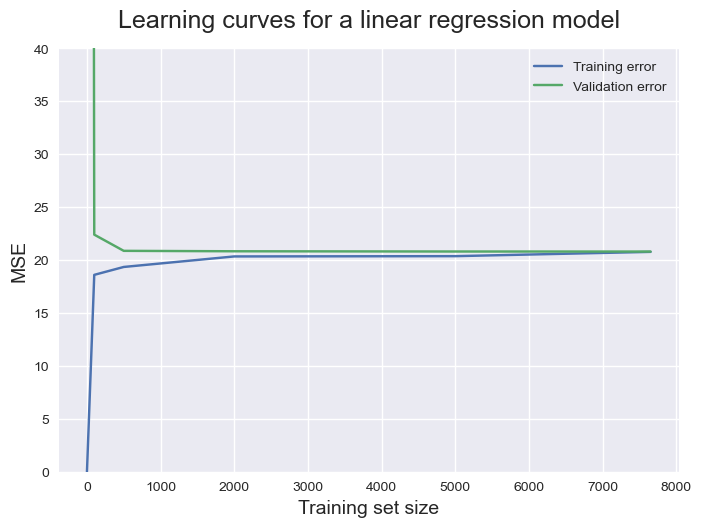

In [11]:
#plot the learning curves using matplotlib
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,40)

#### Interpreting
- training error started to increase gradually to 500 training set size, and increase lightly afterward, indicating addition of more training examples doesn’t improve the model performance on training data.
- validation error started to decrease gradually to 500 training set size, and started to increase lightly along with training error, indicating addition of more training examples doesn’t improve the model performance on unseen data.
- These indicate our model is underfitting

### Learning curves – low bias and high variance

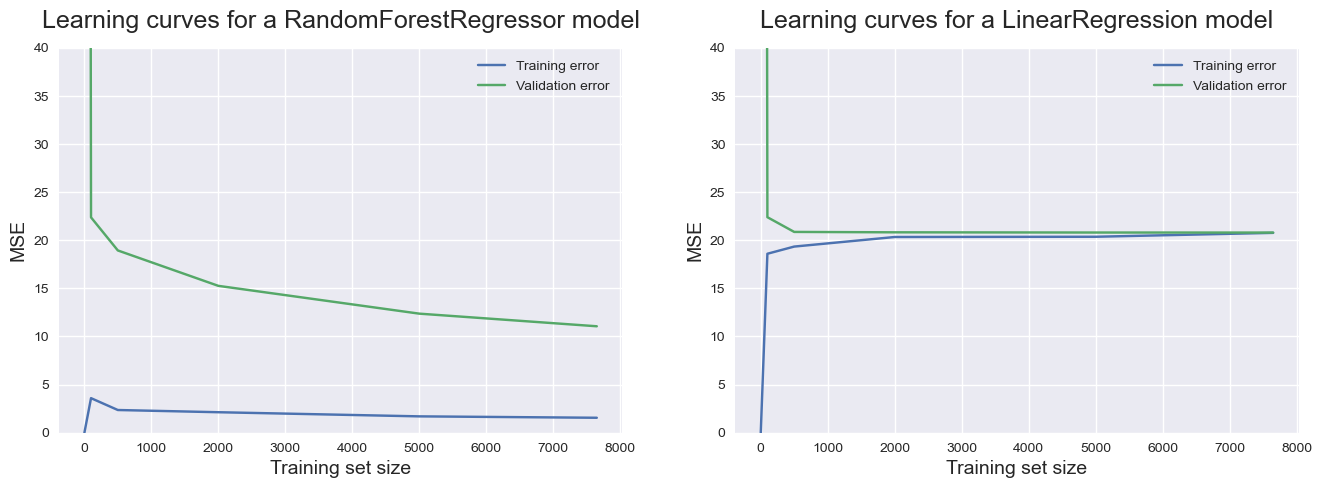

In [14]:
### Bundling our previous work into a function ###
def learning_curves(estimator, data, features, target, train_sizes, cv):
    train_sizes, train_scores, validation_scores = learning_curve(
    estimator, data[features], data[target], train_sizes =
    train_sizes,
    cv = cv, scoring = 'neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)

    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,40)

### Plotting the two learning curves ###

from sklearn.ensemble import RandomForestRegressor

plt.figure(figsize = (16,5))

for model, i in [(RandomForestRegressor(), 1), (LinearRegression(),2)]:
    plt.subplot(1,2,i)
    learning_curves(model, electric_outputs, features, target, train_sizes, 5)